<a href="https://colab.research.google.com/github/lincolngadea/colab_learning/blob/main/superv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_movies = pd.read_csv('/content/sample_data/movies.csv')
df_ratings = pd.read_csv('/content/sample_data/ratings.csv')

In [3]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# Recuperando qual foi o filme com id = 50
df_movies[df_movies['movieId'] == 50]

,movieId,title,genres
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [6]:
# Agrupa os dataframes para juntar cada usuário e fime que viu
df_ratings_movies = pd.merge(df_movies, df_ratings, on='movieId')
df_ratings_movies.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [7]:
# Analisando os dados
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Atribuindo o valor médio das notas atribuidas para cada filme
df_ratings_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head()

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0


In [9]:
# Conta a quantidade de notas que o filme recebeu
df_ratings_movies.groupby('title')['rating'].count().sort_values(ascending=False).head()

,rating
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278


In [10]:
# Cria um dataframe que vai conter o nome de cada filme e a média das notas recebidas
ratings = pd.DataFrame(df_ratings_movies.groupby('title')['rating'].mean())
ratings.sort_values('rating', ascending=False).head()

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0


In [11]:
# Adiciona a coluna que contem a quantidade de notas que cada um dos filmes recebeu
ratings['num de avaliacoes'] = pd.DataFrame(df_ratings_movies.groupby('title')['rating'].count())
ratings.sort_values(by='num de avaliacoes', ascending=False).head()

,rating,num de avaliacoes
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [29]:
ratings.sort_values(by='rating', ascending=False).head()

,rating,num de avaliacoes
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1


<Axes: >

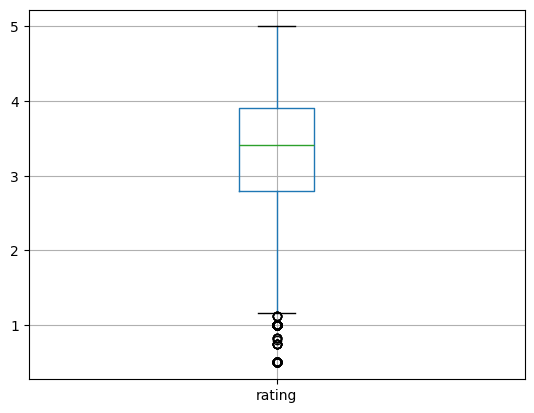

In [12]:
ratings.boxplot(column='rating')

<Axes: >

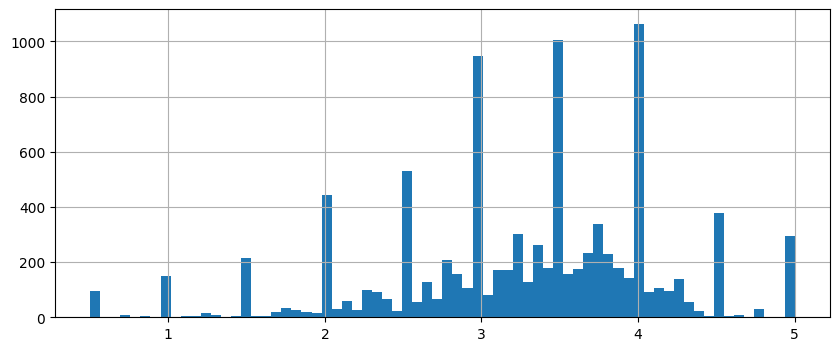

In [13]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

In [14]:
# Construção de uma matriz que relaciona cada usuário à nota (rating) que foi atribuida a cada filme
movie_rating_matrix = df_ratings_movies.pivot_table(index='userId', columns='title', values='rating')
movie_rating_matrix.tail()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,...,NaN,4.0,3.5,3.0,NaN,NaN,2.0,1.5,NaN,NaN


In [15]:
# Refina a matriz de correlação
movie_corr_matrix = movie_rating_matrix.corr(method='pearson',min_periods=50)
movie_corr_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
movie_corr_matrix.tail()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx (2002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx: State of the Union (2005),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
¡Three Amigos! (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
À nous la liberté (Freedom for Us) (1931),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
movie_rating_matrix.shape

(610, 9719)

In [18]:
teste_user = movie_rating_matrix.iloc[600].dropna()
teste_user.head(10).sort_values(ascending=False)

,601
title,
12 Angry Men (1957),5.0
Band of Brothers (2001),5.0
"Avengers, The (2012)",4.5
Batman Begins (2005),4.5
Big Hero 6 (2014),4.5
2012 (2009),4.0
Armageddon (1998),4.0
Avatar (2009),4.0
"Beautiful Mind, A (2001)",4.0


In [19]:
# Quantidade de avalicações realizadas pelo usuário
len(teste_user)

101

In [20]:
# Identifica o filme do índice 2
teste_user.index[2]

'Armageddon (1998)'

In [21]:
# Nota atribuida pelo usuário ao filme de índice 2
teste_user[2]

<ipython-input-21-9fa189530fd3>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  teste_user[2]


4.0

In [22]:
# Encontrando as correlações não nulas entr o filme Armagedon
movie_corr_matrix[teste_user.index[2]].dropna().sort_values(ascending=False)

,Armageddon (1998)
title,
Armageddon (1998),1.000000
Independence Day (a.k.a. ID4) (1996),0.665768
True Lies (1994),0.547632
Star Wars: Episode I - The Phantom Menace (1999),0.457663
American Pie (1999),0.430223
Men in Black (a.k.a. MIB) (1997),0.424516
Indiana Jones and the Temple of Doom (1984),0.420462
Braveheart (1995),0.414973
Saving Private Ryan (1998),0.409837


In [37]:
filmesSimilaresCandidatos = pd.Series(dtype='float64')
# Itera sobre os índices de teste_user
for i in range(0, len(teste_user.index)):
    print("Analisando filme: ", teste_user.index[i] + "...")

    # Obtém os filmes similares ao filme atual, removendo valores NaN
    filmesSimilares = movie_corr_matrix[teste_user.index[i]].dropna()

    # Escala os valores de similaridade com base no valor de teste_user
    filmesSimilares = filmesSimilares.map(lambda x: x * teste_user.iloc[i])

    # Concatena os filmes similares ao conjunto de candidatos
    filmesSimilaresCandidatos = pd.concat([filmesSimilaresCandidatos, filmesSimilares])

# Exibe o resultado final
filmesSimilaresCandidatos

Analisando filme:  12 Angry Men (1957)...
Analisando filme:  2012 (2009)...
Analisando filme:  Armageddon (1998)...
Analisando filme:  Avatar (2009)...
Analisando filme:  Avengers, The (2012)...
Analisando filme:  Band of Brothers (2001)...
Analisando filme:  Batman Begins (2005)...
Analisando filme:  Beautiful Mind, A (2001)...
Analisando filme:  Big Hero 6 (2014)...
Analisando filme:  Blade Runner 2049 (2017)...
Analisando filme:  Bourne Ultimatum, The (2007)...
Analisando filme:  Brave (2012)...
Analisando filme:  Bug's Life, A (1998)...
Analisando filme:  Casablanca (1942)...
Analisando filme:  Casino Royale (2006)...
Analisando filme:  Catch Me If You Can (2002)...
Analisando filme:  City of God (Cidade de Deus) (2002)...
Analisando filme:  Coco (2017)...
Analisando filme:  Contact (1997)...
Analisando filme:  Dark Knight Rises, The (2012)...
Analisando filme:  Departed, The (2006)...
Analisando filme:  District 9 (2009)...
Analisando filme:  Django Unchained (2012)...
Analisando 

,0
12 Angry Men (1957),5.000000
Aladdin (1992),1.488515
Alien (1979),0.087840
American Beauty (1999),0.145139
American Pie (1999),1.720891
...,...
Star Wars: Episode VI - Return of the Jedi (1983),2.143167
Toy Story (1995),1.186169
Up (2009),2.484034
WALL·E (2008),5.000000


In [36]:
# Ordena os filmes encontrados (Series) em ordem de similaridade
filmesSimilaresCandidatos.sort_values(inplace = True, ascending = False)
filmesSimilaresCandidatos.head(15)

,0
"Matrix, The (1999)",86.143677
Inception (2010),85.205182
"Lord of the Rings: The Return of the King, The (2003)",71.533869
"Monsters, Inc. (2001)",69.753100
Saving Private Ryan (1998),69.333854
Finding Nemo (2003),69.224868
Fight Club (1999),69.197407
"Silence of the Lambs, The (1991)",66.731743
Batman Begins (2005),65.728736
"Shawshank Redemption, The (1994)",64.043923


In [35]:
# Como os filmes podem aparecer mais de uma vez, soma a similaridade deles
filmesSimilaresCandidatos = filmesSimilaresCandidatos.groupby(filmesSimilaresCandidatos.index).sum()
filmesSimilaresCandidatos.sort_values(inplace = True, ascending = False)
filmesSimilaresCandidatos.head(10)

,0
"Matrix, The (1999)",86.143677
Inception (2010),85.205182
"Lord of the Rings: The Return of the King, The (2003)",71.533869
"Monsters, Inc. (2001)",69.753100
Saving Private Ryan (1998),69.333854
Finding Nemo (2003),69.224868
Fight Club (1999),69.197407
"Silence of the Lambs, The (1991)",66.731743
Batman Begins (2005),65.728736
"Shawshank Redemption, The (1994)",64.043923


In [38]:
# Encontra apenas os filmes que o usuário não assistiu
filtra_filmes= filmesSimilaresCandidatos[~filmesSimilaresCandidatos.isin(teste_user.index)]
filtra_filmes.head()

,0
12 Angry Men (1957),5.000000
Aladdin (1992),1.488515
Alien (1979),0.087840
American Beauty (1999),0.145139
American Pie (1999),1.720891


In [39]:
# Valida se de fato o usuário já assistiu a um dos filmes encontrados ou não
filme = ['12 Angry Men (1957)', 'Aladdin (1992)']
filme in list(teste_user.index)

False

In [40]:
# Filmes a serem recomendados
filtra_filmes_recomendados = filtra_filmes.sort_values(ascending=False)
filtra_filmes_recomendados.head(50)

,0
12 Angry Men (1957),5.000000
"Monsters, Inc. (2001)",5.000000
"Departed, The (2006)",5.000000
Fight Club (1999),5.000000
Finding Nemo (2003),5.000000
"Godfather, The (1972)",5.000000
How to Train Your Dragon (2010),5.000000
Inception (2010),5.000000
"Incredibles, The (2004)",5.000000
Interstellar (2014),5.000000
